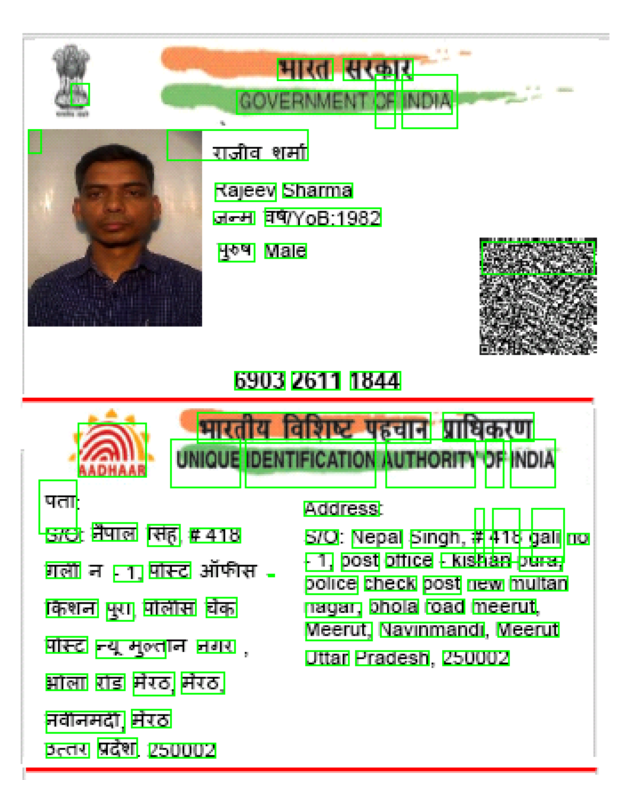

In [60]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

image = cv2.imread('aadhar_full.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(gray_image, config=config)

boxes_data = pytesseract.image_to_data(gray_image, config=config)

boxes = boxes_data.splitlines()
boxes = [b.split() for b in boxes]

for box in boxes[1:]:
    if len(box) == 12: 
        x, y, w, h = int(box[6]), int(box[7]), int(box[8]), int(box[9])
        # print(box[11])
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()


In [56]:
import cv2
import pytesseract

image = cv2.imread('aadhar_full.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

config = r'--oem 3 --psm 6' 
text = pytesseract.image_to_string(gray_image, config=config)

boxes_data = pytesseract.image_to_data(gray_image, config=config)

boxes = boxes_data.splitlines()
boxes = [b.split() for b in boxes]

left, top = 0, 0
for box in boxes[1:]:
    if len(box) == 12:  
        if 'Address' in box[11]:
            left = int(box[6])
            top = int(box[7])

# print(left, top)

h, w = gray_image.shape

roi = gray_image[top:h, left:w]
roi_text = pytesseract.image_to_string(roi, config=config)
print(roi_text)


AdGress:
S/O: Nepal Singh, # 418 galino
“1, post office - kishan pura,
police check post new muttan
nagar, bhola road meerut,

Meerut, Navinmandi, Meerut

Uttar Pradesh, 250002

